# Driverless AI Python Client - Miscellaneous Capabilities
This notebook walks through various capabilities that can be done with the Python client

##### <h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
        <li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook Setup</a>
        <li><span><a href="#Connect-to-Driverless-AI" data-toc-modified-id="Connect-to-Driverless-AI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Connect to Driverless AI</a></span></li>
        <li><span><a href="#Prepare-and-Analyze-Datasets" data-toc-modified-id="Prepare-and-Analyze-Datasets"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare-and-Analyze-Datasets</a></span></li>
        <li><span><a href="#Use-data-recipe-to-drop-a-column" data-toc-modified-id="Use-data-recipe-to-drop-a-column"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use-data-recipe-to-drop-a-column</a></span></li>
        <li><span><a href="#AutoViz-Plots" data-toc-modified-id="AutoViz-Plots"><span class="toc-item-num">5&nbsp;&nbsp;</span>AutoViz-Plots</a></span></li>
        <li><span><a href="#View-Settings-from-Old-Experiment" data-toc-modified-id="View-Settings-from-Old-Experiment"><span class="toc-item-num">6&nbsp;&nbsp;</span>View-Settings-from-Old-Experiment</a></span></li>
        <li><span><a href="#Search-Expert-Settings-with-keyword" data-toc-modified-id="Search-Expert-Settings-with-keyword"><span class="toc-item-num">7&nbsp;&nbsp;</span>Search-Expert-Settings-with-keyword</a></span></li>
        <li><span><a href="#Run-Experiment" data-toc-modified-id="Run-Experiment"><span class="toc-item-num">8&nbsp;&nbsp;</span>Run-Experiment</a></span></li>
        <li><span><a href="#Obtain-Shapley-Values" data-toc-modified-id="Obtain-Shapley-Values"><span class="toc-item-num">9&nbsp;&nbsp;</span>Obtain-Shapley-Values</a></span></li>
        <li><span><a href="#Obtain-Lift-Chart-Data-(and-other-quantile-data)" data-toc-modified-id="Obtain-Lift-Chart-Data-(and-other-quantile-data)"><span class="toc-item-num">10&nbsp;&nbsp;</span>Obtain-Lift-Chart-Data-(and-other-quantile-data)</a></span></li>
        <li><span><a href="#Obtaining-Transformed-Features" data-toc-modified-id="Obtaining-Transformed-Features"><span class="toc-item-num">11&nbsp;&nbsp;</span>Obtaining-Transformed-Features</a></span></li>
        <li><span><a href="#Download-MOJO" data-toc-modified-id="Download-MOJO"><span class="toc-item-num">12&nbsp;&nbsp;</span>Download-MOJO</a></span></li>
        <li><span><a href="#Run-Machine-Learning-Interpretation-(MLI)" data-toc-modified-id="Run-Machine-Learning-Interpretation-(MLI)"><span class="toc-item-num">13&nbsp;&nbsp;</span>Run-Machine-Learning-Interpretation-(MLI)</a></span></li>
        <li><span><a href="#Obtain-and-process-PDP-data" data-toc-modified-id="Obtain-and-process-PDP-data"><span class="toc-item-num">14&nbsp;&nbsp;</span>Obtain-and-process-PDP-data</a></span></li>
        <li><span><a href="#Create-Autoreport-using-template" data-toc-modified-id="Create-Autoreport-using-template"><span class="toc-item-num">15&nbsp;&nbsp;</span>Create-Autoreport-using-template</a></span></li>

## Notebook Setup
- This notebook uses the beta python client - if you would like to be a beta tester please reach out to your H2O.ai contact
- This notebook has been written and tested in 1.8.6
- Python >= 3.6 is required
- You can use Shift+Tab to the see the signature and docstring of any function while using Jupyter

In [1]:
import driverlessai
import getpass
import os
import pandas as pd
from vega import VegaLite
from paramiko import SSHClient
import json

## Connect to Driverless AI

In [2]:
address = 'http://172.16.4.125:61841'#'http://localhost:12345'
username = 'h2oai'
password = getpass.getpass("Enter your Driverless AI password: ")

dai = driverlessai.Client(address=address, username=username, password=password)

Enter your Driverless AI password: ········


### Prepare and Analyze Datasets

In [3]:
# Check available data sources
dai.connectors.list()

['upload', 'file', 'hdfs', 's3', 'recipe_file', 'recipe_url']

In [4]:
# Upload data from DAI's file system
ds = dai.datasets.create('sample_data/creditcard/creditcard.csv', #path to data
                         name='cc_data',
                         data_source="file", #pull data through file system
                         force=True)

Complete 100.00% - [4/4] Computing column statistics  


In [5]:
# Print number of rows and columns
ds.shape

(23999, 25)

In [6]:
# Display first 5 rows
ds.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,-2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,1,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,2,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Get column summaries for first 5 variables
print(ds.column_summaries()[:5])

--- ID ---

       1|████████████████████
        |████████████████████
        |████████████████████
        |████████████████████
        |████████████████████
        |████████████████████
        |████████████████████
        |████████████████████
        |████████████████████
 2.4e+04|████████████████████

Data Type: int
Logical Types: []
Datetime Format: 
Count: 23999
Missing: 0
Mean: 1.2e+04
SD: 6.93e+03
Min: 1
Max: 2.4e+04
Unique: 23999
Freq: 1
--- LIMIT_BAL ---

 1e+04|████████████████████
      |████████████
      |████████
      |████
      |██
      |
      |
      |
      |
 1e+06|

Data Type: int
Logical Types: []
Datetime Format: 
Count: 23999
Missing: 0
Mean: 1.65e+05
SD: 1.29e+05
Min: 1e+04
Max: 1e+06
Unique: 79
Freq: 2740
--- SEX ---

 1|████████████
 2|████████████████████

Data Type: int
Logical Types: []
Datetime Format: 
Count: 23999
Missing: 0
Mean: 1.63
SD: 0.483
Min: 1
Max: 2
Unique: 2
Freq: 15078
--- EDUCATION ---

 0|
  |███████████████
  |███████████████████

In [8]:
# Define target column
target = 'default payment next month'

## Use data recipe to drop a column

In [9]:
data_recipe_code = """
X = X.to_pandas()
X = X.drop(columns = ['PAY_AMT6'])
return X
"""

name = 'new_data'
ds2 = ds.modify_by_code(data_recipe_code, names = [name])[name]

Complete                                            


In [10]:
# Split data
dai_data_split = ds2.split_to_train_test(train_size = 0.9, 
                    train_name = 'cc_train', 
                    test_name = 'cc_test', 
                    target_column = target,
                    seed = 12345)

Complete


In [11]:
train, test = dai_data_split.values()

## AutoViz Plots
Current Python client uses old client backdoor (`._backend`)

### Histogram from AutoViz

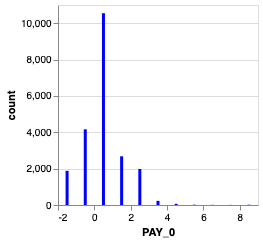

In [12]:
hist = dai._backend.autoviz.get_histogram(train.key, variable_name='PAY_0')
VegaLite(hist)

### Scatterplot from AutoViz

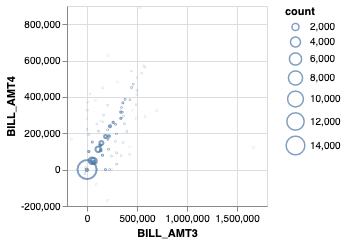

In [13]:
barchart = dai._backend.autoviz.get_scatterplot(train.key, x_variable_name='BILL_AMT3', y_variable_name='BILL_AMT4')
VegaLite(barchart)

### Parallel Coordinates from AutoViz

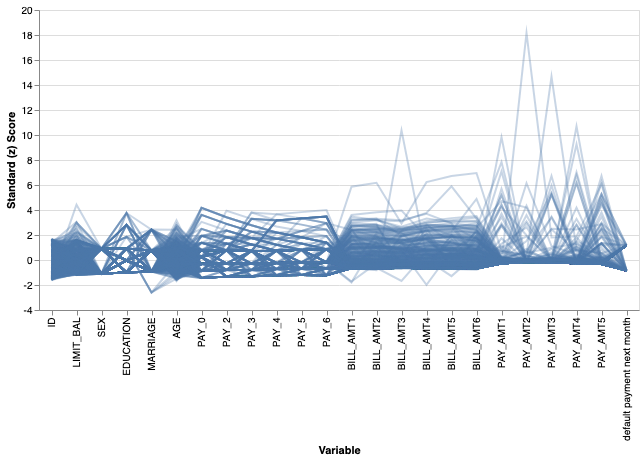

In [14]:
parallel_coord = dai._backend.autoviz.get_parallel_coordinates_plot(train.key)
VegaLite(parallel_coord)

## View Settings from Old Experiment
We will get an old experiment's id and obtain it's settings

In [15]:
# Get list of previous experiments
dai.experiments.list()

[<class 'driverlessai._experiments.Experiment'> 16950b64-e37e-11ea-8496-ac1f6b68b7be cc_experiment,
 <class 'driverlessai._experiments.Experiment'> 7f67321c-e37d-11ea-8496-ac1f6b68b7be cc_experiment]

In [16]:
# Call experiment using key
ex_old = dai.experiments.get("7f67321c-e37d-11ea-8496-ac1f6b68b7be")

In [17]:
# Show settings of experiment
ex_old.settings

{'task': 'classification',
 'target_column': 'default payment next month',
 'accuracy': 1,
 'time': 1,
 'interpretability': 10,
 'scorer': 'AUC',
 'included_models': ['GLM', 'DECISIONTREE']}

## Search Expert Settings with keyword

In [18]:
# Search Expert Settings using keywords
dai.experiments.search_expert_settings('monotonic')

monotonicity_constraints_correlation_threshold | default_value: 0.1
excluded_genes | default_value: []


In [19]:
# Search Expert Settings using keywords (include description)
dai.experiments.search_expert_settings('monotonic', show_description=True)

monotonicity_constraints_correlation_threshold | default_value: 0.1 | Correlation beyond which triggers monotonicity constraints (if enabled)
  Threshold, of Pearson product-moment correlation coefficient between numerical or encoded transformed feature and target, above (below negative for) which will enforce positive (negative) monotonicity for XGBoost and LightGBM. Enabled when interpretability >= monotonicity_constraints_interpretability_switch config toml value

excluded_genes | default_value: [] | Exclude specific genes
  Exclude list of genes (i.e. genes (built on top of transformers) to not use, independent of the interpretability setting) Some transformers are used by multiple genes, so this allows different control over feature engineering  for multi-class: '['InteractionsGene', 'WeightOfEvidenceGene', 'NumToCatTargetEncodeSingleGene', 'OriginalGene', 'TextGene', 'FrequentGene', 'NumToCatWeightOfEvidenceGene', 'NumToCatWeightOfEvidenceMonotonicGene', ' CvTargetEncodeSingleGen

In [20]:
# Specify expert settings (example below is for monotonic constraints)
settings = {
    'monotonicity_constraints_correlation_threshold': 0.01
}

## Run Experiment

In [21]:
# Preview default settings
dai.experiments.preview(
    train_dataset = train,
    target_column = target,
    task = 'classification',
    **settings #Unpack python dictionary as arguments
)

ACCURACY [5/10]:
- Training data size: *21,599 rows, 24 cols*
- Feature evolution: *[Constant, GLM, LightGBM, XGBoostGBM]*, *1/3 validation split*
- Final pipeline: *Ensemble (8 models), 4-fold CV*

TIME [4/10]:
- Feature evolution: *4 individuals*, up to *56 iterations*
- Early stopping: After *5* iterations of no improvement

INTERPRETABILITY [6/10]:
- Feature pre-pruning strategy: Permutation Importance FS
- Monotonicity constraints: disabled
- Feature engineering search space: [CVCatNumEncode, CVTargetEncode, CatOriginal, Cat, ClusterTE, Frequent, Interactions, NumCatTE, NumToCatTE, NumToCatWoE, OneHotEncoding, Original, WeightOfEvidence]

[Constant, GLM, LightGBM, XGBoostGBM] models to train:
- Model and feature tuning: *16*
- Feature evolution: *84*
- Final pipeline: *8*

Estimated runtime: *minutes*
Auto-click Finish/Abort if not done in: *1 day*/*7 days*


In [22]:
# List model recipes available
[m.name for m in dai.recipes.models.list()]

['CONSTANT',
 'DECISIONTREE',
 'FTRL',
 'GLM',
 'IMBALANCEDLIGHTGBM',
 'IMBALANCEDXGBOOSTGBM',
 'LIGHTGBM',
 'RULEFIT',
 'TENSORFLOW',
 'XGBOOSTDART',
 'XGBOOSTGBM']

In [23]:
# Create new settings
settings = {
    'monotonicity_constraints_correlation_threshold': 0.01,
    'make_python_scoring_pipeline': 'off',
    'benchmark_mojo_latency': 'off',
    'make_autoreport': False,
    'check_leakage': 'off',
    'check_distribution_shift': 'off'
}

In [24]:
# Run the experiment
experiment = dai.experiments.create(name = "cc_experiment", # Set experiment name
                                    **dai_data_split, # Specify train and test (optional)
                                    target_column=target, 
                                    task="classification",
                                    accuracy=1, time=1, interpretability=10, # Basic knob settings
                                    scorer="AUC", # Scorer to use
                                    models=['GLM', 'DECISIONTREE'], # Select two models
                                    **settings, # Settings defined above to include
                                    force=True)

Experiment launched at: http://172.16.4.125:61841/#experiment?key=84260dce-e386-11ea-8496-ac1f6b68b7be
Complete 100.00% - Status: Complete                                               


In [25]:
# Check experiment status (if using asynchronous functions)
print('Experiment is complete?', experiment.is_complete())
print('Experiment is running?', experiment.is_running())

Experiment is complete? True
Experiment is running? False


In [26]:
# Show experiment summary
experiment.summary()

Status: Complete
Experiment: cc_experiment (84260dce-e386-11ea-8496-ac1f6b68b7be)
  Version: 1.8.4.1, 2020-08-21 01:17
  Settings: 1/1/10, seed=1016316868, GPUs enabled
  Train data: cc_train (21599, 24)
  Validation data: N/A
  Test data: cc_test (2400, 23)
  Target column: default payment next month (binary, 22.371% target class)
System specs: Linux, 125 GB, 40 CPU cores, 1/1 GPU
  Max memory usage: 0.519 GB, 0.155 GB GPU
Recipe: AutoDL (4 iterations, 2 individuals)
  Validation scheme: stratified, 1 internal holdout
  Feature engineering: 50 features scored (4 selected)
Timing:
  Data preparation: 8.06 secs
  Shift/Leakage detection: 0.01 secs
  Model and feature tuning: 11.26 secs (4 models trained)
  Feature evolution: 28.50 secs (5 models trained)
  Final pipeline training: 40.94 secs (5 models trained)
  Python / MOJO scorer building: 0.01 secs / 1.22 secs
Validation score: AUC = 0.5 (constant preds of 0.2237)
Validation score: AUC = 0.7485871 +/- 0.00747643 (baseline)
Validatio

## Obtain Shapley Values

In [27]:
# Run prediction to obtain Shapley values
shap_data = experiment.predict(dataset = test, 
                   include_shap_values = True)

Complete


In [28]:
# Download shap data in DAI Experiment folder
download_location = "."
shap_location = shap_data.download(dst_dir = download_location)
shap_location

Downloaded '84260dce-e386-11ea-8496-ac1f6b68b7be_preds_f283eb3a.csv'


'84260dce-e386-11ea-8496-ac1f6b68b7be_preds_f283eb3a.csv'

In [29]:
# Read newly saved shap dataset
shap_df = pd.read_csv(shap_location)

shap_df.head()

,default payment next month.0,default payment next month.1,contrib_18_PAY_AMT3,contrib_26_Freq:PAY_0,contrib_48_CVTE:PAY_0:PAY_6.0,contrib_55_CVTE:PAY_2:PAY_6.0,contrib_bias
0,0.882773,0.117227,-0.216351,-0.101470,-0.431711,-0.034144,-1.235275
1,0.809376,0.190624,0.324686,0.142157,-0.633524,-0.044002,-1.235275
2,0.679565,0.320436,-0.072202,-0.376193,1.126804,-0.194905,-1.235275
3,0.860791,0.139209,-0.044382,0.134327,-0.634158,-0.042387,-1.235275
4,0.882773,0.117227,-0.216351,-0.101470,-0.431711,-0.034144,-1.235275


#### Alternative Option
After running MLI interpretation, shapley data is saved on DAI directory:
    - `~/{tmp_dir}/{mli_experiment_*}/shapley.csv`
    - `~/{tmp_dir}/{mli_experiment_*}/shapley.orig.feat.csv`
    
    In 1.9.0 location is: `~/{tmp_dir}/{username}/{mli_experiment_*}/`

## Obtain Lift Chart Data (and other quantile data)

In [30]:
# Pull lift, gains data for test dataset
pd.DataFrame(experiment._info.entity.test_gains.dump())
# Validation data can also be obtained with `experiment._info.entity.valid_gains.dump()`

,quantiles,gains,lifts,cum_right,cum_wrong
0,0.01,0.035382,3.538175,19.0,5.0
1,0.02,0.063315,3.165736,34.0,14.0
2,0.03,0.100559,3.351955,54.0,18.0
3,0.04,0.134078,3.351955,72.0,24.0
4,0.05,0.165736,3.314711,89.0,31.0
5,0.10,0.318436,3.184358,171.0,69.0
6,0.15,0.417132,2.780881,224.0,136.0
7,0.20,0.484171,2.420857,260.0,220.0
8,0.30,0.594041,1.980137,319.0,401.0
9,0.40,0.674115,1.685289,362.0,598.0


## Obtaining Transformed Features
#### Warning: this feature is for experimentation/insights and not to be used for building new models, which can lead to overfitting

In [31]:
# Run fit and transform of new data
transformed_data = dai._backend.fit_transform_batch_sync(model_key = experiment.key, 
                                      training_dataset_key = train.key, 
                                      validation_dataset_key = None, 
                                      test_dataset_key = test.key, 
                                      validation_split_fraction = 0.75,
                                      seed = 12345, 
                                      fold_column = None)

In [32]:
print('Location of transformed train data:', transformed_data.training_output_csv_path)

Location of transformed train data: h2oai_experiment_84260dce-e386-11ea-8496-ac1f6b68b7be/luhakuga.1597997737.6975856.bin.munged_train.csv


In [33]:
print('Location of transformed train data:', transformed_data.test_output_csv_path)

Location of transformed train data: h2oai_experiment_84260dce-e386-11ea-8496-ac1f6b68b7be/bodolefo.1597997737.711761.bin.munged_test.csv


In [34]:
print('Location of transformed train data:', transformed_data.validation_output_csv_path)

Location of transformed train data: h2oai_experiment_84260dce-e386-11ea-8496-ac1f6b68b7be/luhakuga.1597997737.6975856.bin.munged_valid.csv


In [35]:
# Download new transformed CSVs
dai._backend.download(transformed_data.training_output_csv_path, ".")
dai._backend.download(transformed_data.test_output_csv_path, ".")
dai._backend.download(transformed_data.validation_output_csv_path, ".");

## Download MOJO

In [36]:
artifacts = experiment.artifacts.download(only='mojo_pipeline', dst_dir=download_location, overwrite=True)
artifacts

Downloaded './mojo.zip'


{'mojo_pipeline': './mojo.zip'}

## Run Machine Learning Interpretation (MLI)

In [37]:
# Run MLI using `_backend`
mli_experiment = dai._backend.run_interpretation_sync(dai_model_key = experiment.key,
                                               dataset_key = test.key,
                                               target_col = target,
                                               use_raw_feature = True)

print('MLI key:', mli_experiment.key)
print('MLI description:', mli_experiment.description)

MLI key: c61f9772-e386-11ea-8496-ac1f6b68b7be
MLI description: finiheci


## Obtain and process PDP data
Below we will:
- ssh to the DAI server and read the json files that contain PDP data located in the MLI directory
- mli-pd-dai-model.json is PDP of the final model, and pdp.json is the PDP for MLI’s surrogate
- process the json data into pandas dataframes

In [38]:
print('MLI Directory is here:', mli_experiment.tmp_dir)

MLI Directory is here: ./tmp/mli_experiment_c61f9772-e386-11ea-8496-ac1f6b68b7be


In [39]:
# Access file through SSH (if Notebook is remotely connected)
client = SSHClient()
client.load_system_host_keys()
client.connect('172.16.4.125', username=getpass.getpass('Input username to SSH'))

Input username to SSH········


In [43]:
sftp_client = client.open_sftp()
dai_path = '/data/neema/dai_1841/dai-1.8.4.1-linux-x86_64'
mli_path = dai_path + mli_experiment.tmp_dir[1:]

# Read DAI PDP json (this is PDP data of DAI experiment's final model)
with sftp_client.open(mli_path + '/mli-pd-dai-model.json') as remote_file:
    dai_pdp_dict = json.load(remote_file)
    
# Read Surrogate PDP json (this is PDP data of Surrogate model created in MLI)
with sftp_client.open(mli_path + '/pdp.json') as remote_file:
    surrogate_pdp_dict = json.load(remote_file)

In [44]:
# Create PDP dataframes for each feature of DAI experiment's final model
dai_pdps = {}
for i, col in enumerate(dai_pdp_dict['cols']):
    dai_pdps[col] = pd.DataFrame(data=pd.DataFrame(dai_pdp_dict['partial_dependence_data'][i]['data']).T.values, 
                          columns=[v['name'] for v in dai_pdp_dict['partial_dependence_data'][i]['columns']])

# Create PDP dataframes for each feature of MLI's surrogate model
surrogate_pdps = {}
for i, col in enumerate(surrogate_pdp_dict['cols']):
    surrogate_pdps[col] = pd.DataFrame(
        data=pd.DataFrame(surrogate_pdp_dict['partial_dependence_data'][i]['data']).T.values, 
                          columns=[v['name'] for v in surrogate_pdp_dict['partial_dependence_data'][i]['columns']])

In [45]:
# Display PDP data of DAI experiment's final model
for k, df in dai_pdps.items():
    print(k)
    display(df)

PAY_0


,pay_0,mean_response,stddev_response,std_error_mean_response,oor_response
0,-2,0.214781,0.188669,0.0038512,False
1,-1,0.195889,0.110755,0.00226078,False
2,0,0.184043,0.109464,0.00223443,False
3,1,0.315798,0.0961993,0.00196366,False
4,2,0.719987,0.0937203,0.00191306,False
5,3,0.620699,0.0689322,0.00140707,False
6,4,0.620699,0.0689322,0.00140707,False
7,6,0.620699,0.0689322,0.00140707,False
8,7,0.620699,0.0689322,0.00140707,False
9,8,0.620699,0.0689322,0.00140707,False


PAY_6


,pay_6,mean_response,stddev_response,std_error_mean_response,oor_response
0,-2,0.238065,0.178928,0.00365235,False
1,-1,0.198646,0.140856,0.00287521,False
2,0,0.234015,0.195688,0.00399446,False
3,2,0.415304,0.171238,0.00349539,False
4,3,0.407269,0.158437,0.00323409,False
5,4,0.442106,0.145033,0.00296047,False
6,7,0.442106,0.145033,0.00296047,False


PAY_2


,pay_2,mean_response,stddev_response,std_error_mean_response,oor_response
0,-2,0.230731,0.179431,0.00366262,False
1,-1,0.230731,0.179431,0.00366262,False
2,0,0.231619,0.178917,0.00365212,False
3,1,0.261065,0.195083,0.00398212,False
4,2,0.295384,0.217128,0.00443211,False
5,3,0.295791,0.215339,0.0043956,False
6,4,0.261065,0.195083,0.00398212,False
7,5,0.261065,0.195083,0.00398212,False
8,7,0.261065,0.195083,0.00398212,False


PAY_AMT3


,pay_amt3,mean_response,stddev_response,std_error_mean_response,oor_response
0,0,0.286861,0.18654,0.00380773,False
1,17057.7,0.218812,0.206393,0.00421299,False
2,34115.5,0.211892,0.209825,0.00428304,False
3,51173.2,0.211892,0.209825,0.00428304,False
4,68230.9,0.211892,0.209825,0.00428304,False
5,85288.7,0.211892,0.209825,0.00428304,False
6,102346,0.211892,0.209825,0.00428304,False
7,119404,0.211892,0.209825,0.00428304,False
8,136462,0.211892,0.209825,0.00428304,False
9,153520,0.211892,0.209825,0.00428304,False


AGE


,age,mean_response,stddev_response,std_error_mean_response,oor_response
0,23,0.248012,0.203068,0.00414512,False
1,24,0.248012,0.203068,0.00414512,False
2,25,0.248012,0.203068,0.00414512,False
3,26,0.248012,0.203068,0.00414512,False
4,27,0.248012,0.203068,0.00414512,False
5,28,0.248012,0.203068,0.00414512,False
6,29,0.248012,0.203068,0.00414512,False
7,30,0.248012,0.203068,0.00414512,False
8,31,0.248012,0.203068,0.00414512,False
9,32,0.248012,0.203068,0.00414512,False


BILL_AMT3


,bill_amt3,mean_response,stddev_response,std_error_mean_response,oor_response
0,-15641,0.248012,0.203068,0.00414512,False
1,15551.4,0.248012,0.203068,0.00414512,False
2,46743.8,0.248012,0.203068,0.00414512,False
3,77936.3,0.248012,0.203068,0.00414512,False
4,109129,0.248012,0.203068,0.00414512,False
5,140321,0.248012,0.203068,0.00414512,False
6,171514,0.248012,0.203068,0.00414512,False
7,202706,0.248012,0.203068,0.00414512,False
8,233898,0.248012,0.203068,0.00414512,False
9,265091,0.248012,0.203068,0.00414512,False


BILL_AMT5


,bill_amt5,mean_response,stddev_response,std_error_mean_response,oor_response
0,-20006,0.248012,0.203068,0.00414512,False
1,8977.05,0.248012,0.203068,0.00414512,False
2,37960.1,0.248012,0.203068,0.00414512,False
3,66943.2,0.248012,0.203068,0.00414512,False
4,95926.2,0.248012,0.203068,0.00414512,False
5,124909,0.248012,0.203068,0.00414512,False
6,153892,0.248012,0.203068,0.00414512,False
7,182875,0.248012,0.203068,0.00414512,False
8,211858,0.248012,0.203068,0.00414512,False
9,240841,0.248012,0.203068,0.00414512,False


MARRIAGE


,marriage,mean_response,stddev_response,std_error_mean_response,oor_response
0,0,0.248012,0.203068,0.00414512,False
1,1,0.248012,0.203068,0.00414512,False
2,2,0.248012,0.203068,0.00414512,False
3,3,0.248012,0.203068,0.00414512,False


SEX


,sex,mean_response,stddev_response,std_error_mean_response,oor_response
0,1,0.248012,0.203068,0.00414512,False
1,2,0.248012,0.203068,0.00414512,False


In [46]:
# Display PDP data of surrogate model
for k, df in surrogate_pdps.items():
    print(k)
    display(df)

PAY_0


,pay_0,mean_response,stddev_response,std_error_mean_response
0,-1,0.200567,0.094873,0.00193659
1,-2,0.208693,0.119217,0.00243351
2,0,0.203443,0.114517,0.00233757
3,1,0.298168,0.0794757,0.00162229
4,2,0.665474,0.0747793,0.00152643
5,3,0.537255,0.0976518,0.00199331
6,4,0.434252,0.102168,0.00208549
7,6,0.450171,0.098165,0.00200378
8,7,0.473872,0.0933782,0.00190608
9,8,0.443581,0.110382,0.00225316


PAY_2


,pay_2,mean_response,stddev_response,std_error_mean_response
0,-1,0.229301,0.157404,0.003213
1,-2,0.232062,0.159189,0.00324944
2,0,0.229055,0.161986,0.00330652
3,1,0.357371,0.138822,0.0028337
4,2,0.405734,0.137007,0.00279664
5,3,0.38794,0.142178,0.0029022
6,4,0.353642,0.141998,0.00289852
7,5,0.35624,0.139402,0.00284554
8,7,0.349665,0.147195,0.00300461


PAY_6


,pay_6,mean_response,stddev_response,std_error_mean_response
0,-1,0.224324,0.157923,0.0032236
1,-2,0.237971,0.167424,0.00341754
2,0,0.234371,0.176844,0.00360982
3,2,0.3879,0.143696,0.00293318
4,3,0.369913,0.143437,0.00292789
5,4,0.335859,0.160413,0.00327442
6,7,0.279291,0.178637,0.00364642


PAY_AMT3


,pay_amt3,mean_response,stddev_response,std_error_mean_response
0,0.000000,0.276185,0.173243,0.003536
1,17057.736842,0.220506,0.182629,0.003728
2,34115.473684,0.218401,0.183662,0.003749
3,51173.210526,0.218446,0.183639,0.003749
4,68230.947368,0.218446,0.183639,0.003749
5,85288.684211,0.218967,0.183069,0.003737
6,102346.421053,0.218967,0.183069,0.003737
7,119404.157895,0.218967,0.183069,0.003737
8,136461.894737,0.218967,0.183069,0.003737
9,153519.631579,0.218967,0.183069,0.003737


BILL_AMT5


,bill_amt5,mean_response,stddev_response,std_error_mean_response
0,-20006.000000,0.243548,0.167612,0.003421
1,8977.052632,0.248240,0.188500,0.003848
2,37960.105263,0.247467,0.190023,0.003879
3,66943.157895,0.247547,0.188838,0.003855
4,95926.210526,0.246125,0.189344,0.003865
5,124909.263158,0.247887,0.188569,0.003849
6,153892.315789,0.247096,0.186391,0.003805
7,182875.368421,0.246523,0.186552,0.003808
8,211858.421053,0.246490,0.186555,0.003808
9,240841.473684,0.246314,0.186584,0.003809


BILL_AMT3


,bill_amt3,mean_response,stddev_response,std_error_mean_response
0,-15641.000000,0.243663,0.175515,0.003583
1,15551.421053,0.248047,0.188239,0.003842
2,46743.842105,0.248042,0.188441,0.003847
3,77936.263158,0.247674,0.188189,0.003841
4,109128.684211,0.247186,0.186823,0.003814
5,140321.105263,0.247231,0.185176,0.003780
6,171513.526316,0.245069,0.180825,0.003691
7,202705.947368,0.244366,0.180655,0.003688
8,233898.368421,0.244376,0.180649,0.003687
9,265090.789474,0.244427,0.180642,0.003687


AGE


,age,mean_response,stddev_response,std_error_mean_response
0,21.000000,0.248711,0.186621,0.003809
1,24.052632,0.248288,0.187055,0.003818
2,27.105263,0.247521,0.188073,0.003839
3,30.157895,0.247217,0.187733,0.003832
4,33.210526,0.246672,0.187511,0.003828
5,36.263158,0.247178,0.187841,0.003834
6,39.315789,0.247235,0.187955,0.003837
7,42.368421,0.247335,0.188289,0.003843
8,45.421053,0.247711,0.188119,0.003840
9,48.473684,0.247830,0.187573,0.003829


MARRIAGE


,marriage,mean_response,stddev_response,std_error_mean_response
0,0,0.246659,0.187418,0.00382565
1,1,0.247588,0.18803,0.00383814
2,2,0.247295,0.187387,0.00382502
3,3,0.247464,0.186931,0.00381571


SEX


,sex,mean_response,stddev_response,std_error_mean_response
0,1,0.248112,0.18746,0.00382651
1,2,0.247208,0.188002,0.00383757


## Create Autoreport using template
To successfully build the AutoReport, the custom template should already be located within the DAI h2oai/h2oai_autoreport/templates directory and the following must be set: the configuration override for the AutoReport location, the experiment key, and mli key. 

Specify the location of the autoreport and optionally specify the name of the report (by default the AutoReport is saved as report.docx).

In [47]:
# Make sure you have the template in `h2oai/h2oai_autoreport/templates`
# Set config_overrides
config_overrides = "autodoc_template='my_template.docx'" #Template file
config_overrides += "\nautodoc_report_name='My_autoreport'" #Name of report

In [48]:
report = dai._backend.make_autoreport_sync(
                    model_key = experiment.key,
                    mli_key = mli_experiment.key,
                    individual_rows = [0,1], #List rows of interest for dataset
                    config_overrides = config_overrides)

In [49]:
print("path to the AutoReport:", report.report_path)

path to the AutoReport: h2oai_experiment_84260dce-e386-11ea-8496-ac1f6b68b7be/report_457d4_tmp/My_autoreport.docx
